# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')
library('dplyr')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
turbine.data = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
                         stringsAsFactors = TRUE)

In [3]:
turbine.data |> head()

,objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [4]:
turbine.data.sorted = turbine.data |>
mutate(territory_sorted = province_territory |> fct_infreq())

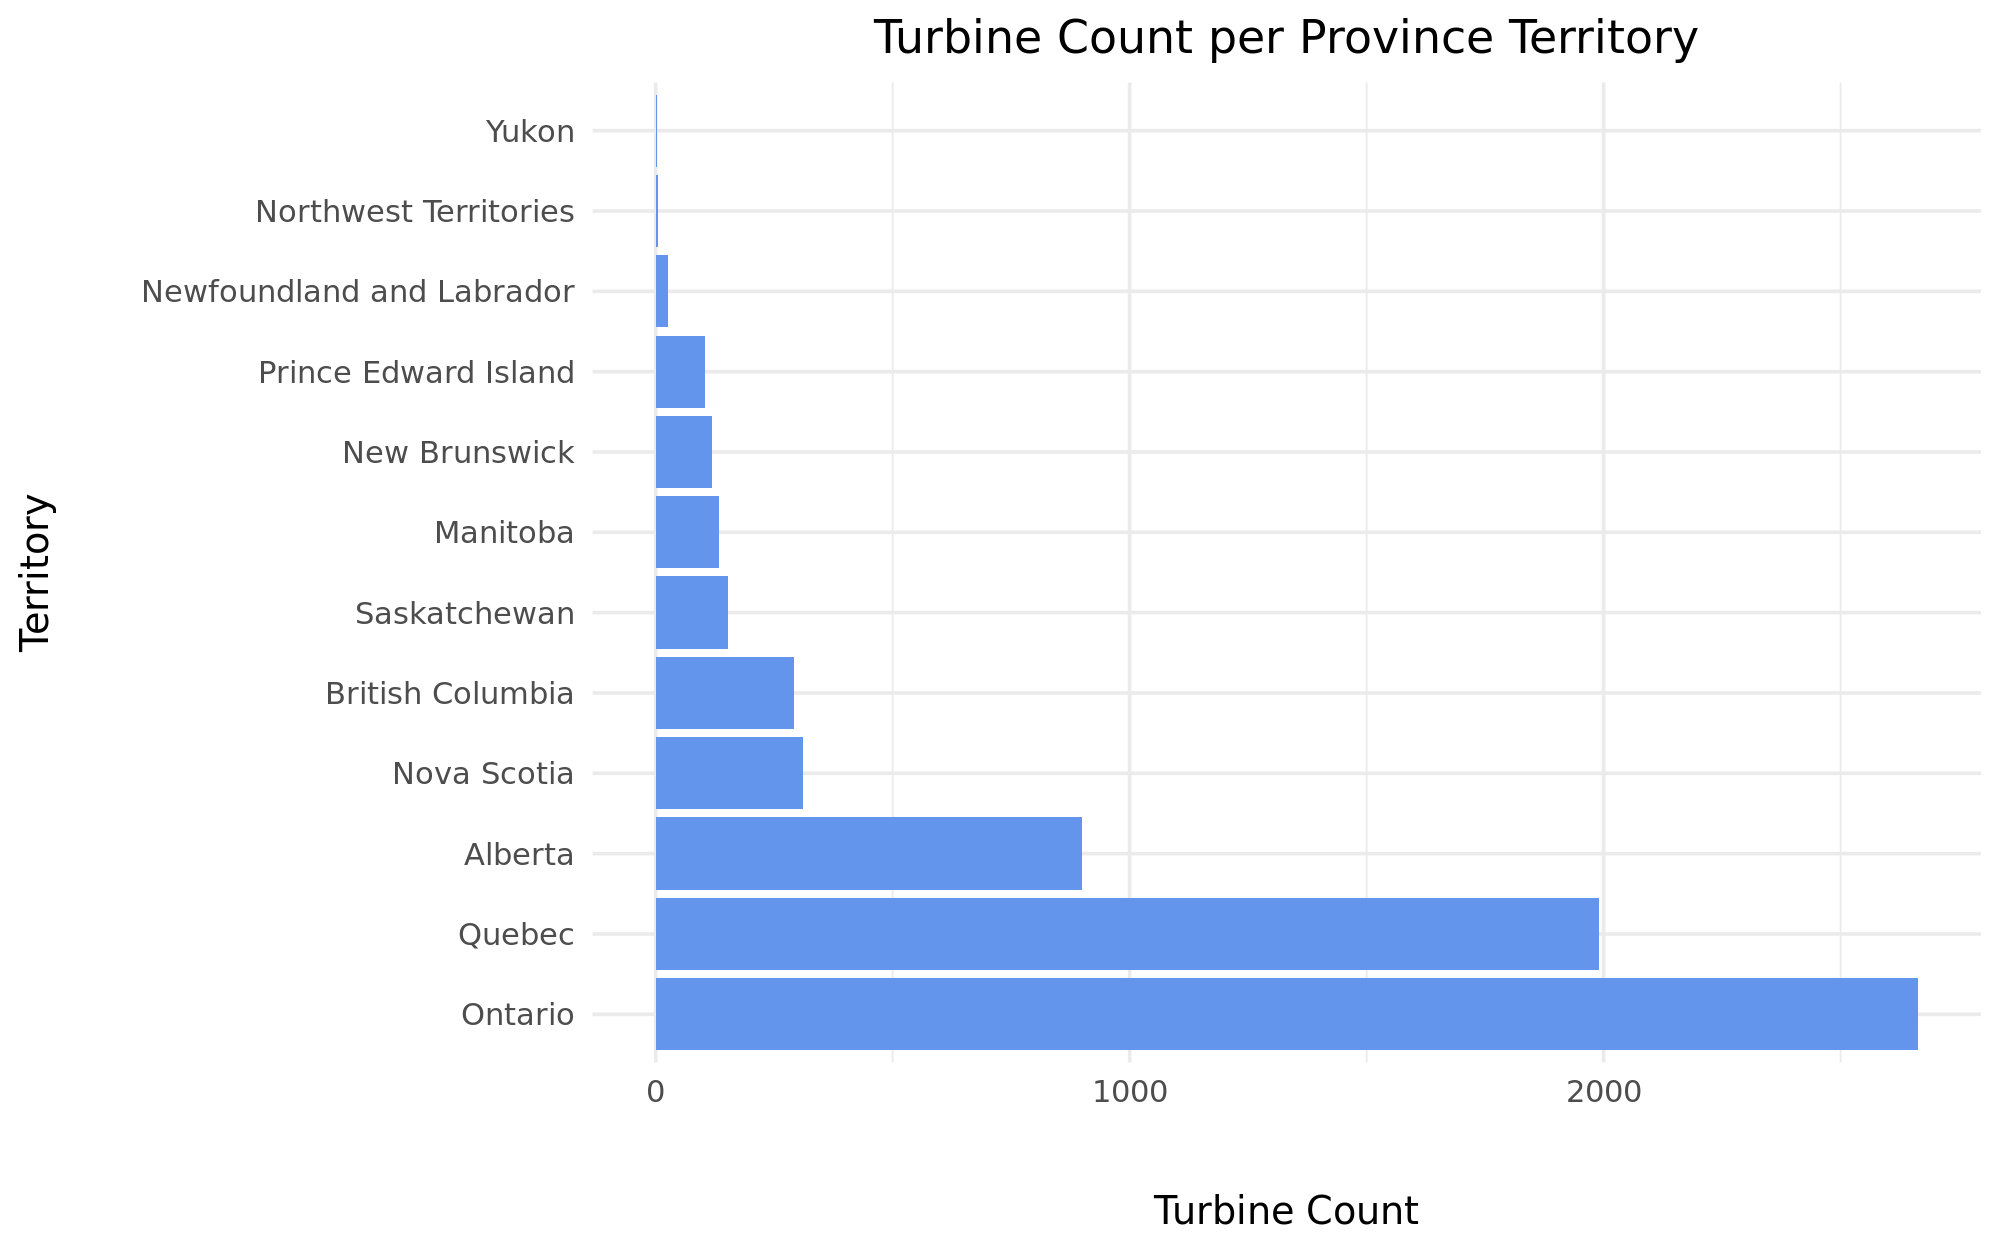

In [17]:
options(repr.plot.res = 250, repr.plot.width = 8, repr.plot.height = 5)

p = ggplot(turbine.data.sorted, aes(y = territory_sorted))

p = p + geom_bar(fill = 'cornflowerblue') + 
    theme_minimal() + 
    labs(x = 'Turbine Count', y = 'Territory', title = 'Turbine Count per Province Territory') +
    theme(plot.title = element_text(hjust = 0.5, vjust = 1)) +
    theme(axis.title.x = element_text(margin = margin(t = 25))) +
    theme(axis.title.y = element_text(margin = margin(r = 25)))

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

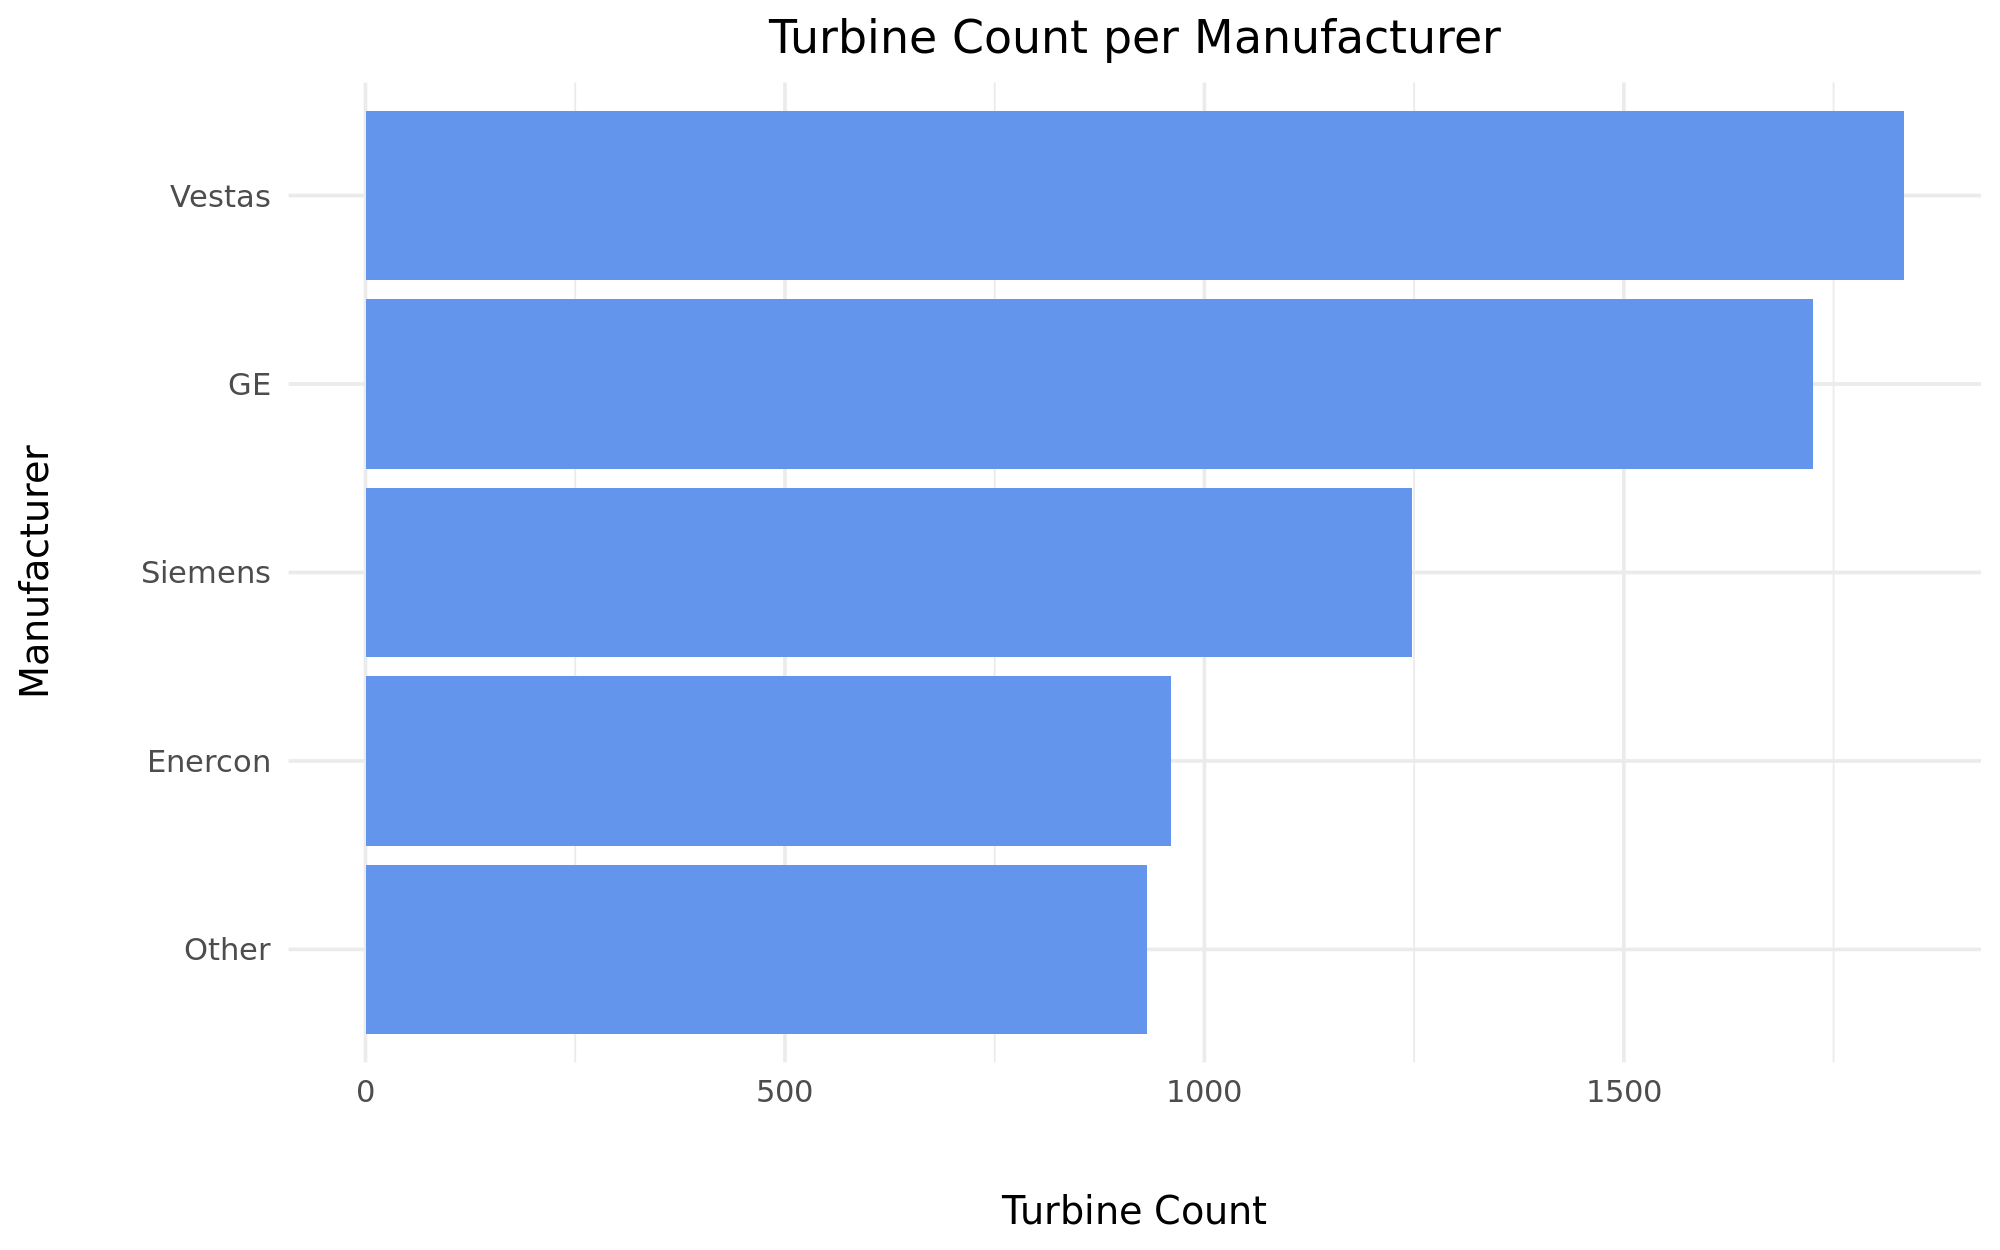

In [11]:
options(repr.plot.res = 250, repr.plot.width = 8, repr.plot.height = 5)

turbine.data.simple = turbine.data |>
mutate(manufacturer.simple = manufacturer |> fct_lump_lowfreq() |> fct_infreq() |> fct_rev())

p = ggplot(turbine.data.simple, aes(y = manufacturer.simple)) + 
    geom_bar(fill = 'cornflowerblue') + theme_minimal() + 
    labs(y = 'Manufacturer', x= 'Turbine Count', title = 'Turbine Count per Manufacturer') + 
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_text(margin = margin(t = 25))) +
    theme(axis.title.y = element_text(margin = margin(r = 25))) 

p